<a href="https://colab.research.google.com/github/raagKush/ML_learning_google_collab/blob/main/simpleModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt


In [38]:
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [39]:
print(training_df.head(1))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  


In [40]:
training_df['median_house_value'] /= 1000.0
training_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82.4
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48.5
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58.4
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48.1


In [14]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,0.207301
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,0.115984
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.014999
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,0.119400
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,0.180400
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,0.265000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,0.500001


In [25]:
def build_model(learningRate):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
  model.compile(optimizer = tf.keras.optimizers.experimental.RMSprop(learning_rate = learningRate),
                loss="mean_squared_error", metrics= [tf.keras.metrics.RootMeanSquaredError()])
  return model

In [32]:
def train_model(model,df,feature,label, epochs,batch_size):
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size = batch_size,
                      epochs = epochs)
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse



In [43]:
def plot_model(trained_weight, trained_bias, feature, label):
  plt.xlabel(feature)
  plt.ylabel(label)
  rand_examples = training_df.sample(n=200)
  plt.scatter(rand_examples[feature],rand_examples[label])
  x0= 0
  y0 = trained_bias
  x1 = rand_examples[feature].max()
  y1 = trained_bias+(trained_weight*x1)
  plt.plot([x0, x1],[y0, y1], c="r")
  plt.show()


In [44]:
def plot_loss_curve(epochs,rmse):
  plt.figure()
  plt.xlabel("epochs")
  plt.ylabel("rmse")

  plt.plot(epochs,rmse, label = "loss")
  plt.ylim([rmse.min()*0.97,rmse.max()])
  plt.legend()
  plt.show()

Epoch 1/5
567/567 [==============================] - 6s 9ms/step - loss: 48097.3047 - root_mean_squared_error: 219.3110
Epoch 2/5
567/567 [==============================] - 1s 2ms/step - loss: 37156.4453 - root_mean_squared_error: 192.7601
Epoch 3/5
567/567 [==============================] - 3s 5ms/step - loss: 27912.6328 - root_mean_squared_error: 167.0707
Epoch 4/5
567/567 [==============================] - 4s 6ms/step - loss: 20369.1602 - root_mean_squared_error: 142.7206
Epoch 5/5
567/567 [==============================] - 5s 9ms/step - loss: 14540.4082 - root_mean_squared_error: 120.5836


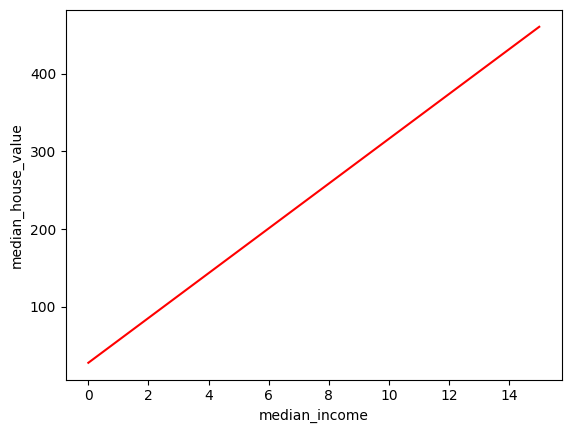

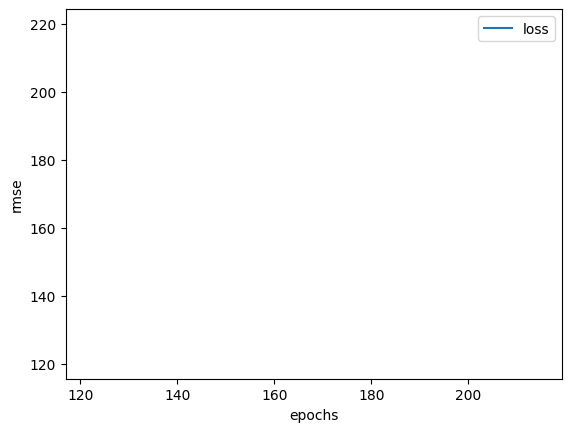

In [41]:
learning_rate = 0.01
epochs = 5
batch_size = 30

my_feature = "median_income"
my_label = "median_house_value"

my_model = None

my_model = build_model(learning_rate)
weight,bias,epochs,rmse = train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)

plot_model(weight,bias,my_feature,my_label)
plot_loss_curve(epochs,rmse)

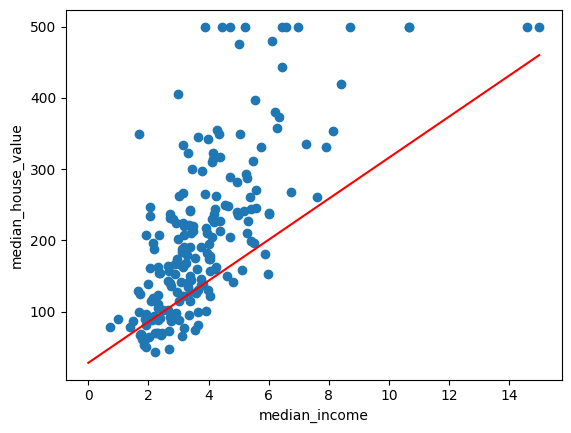

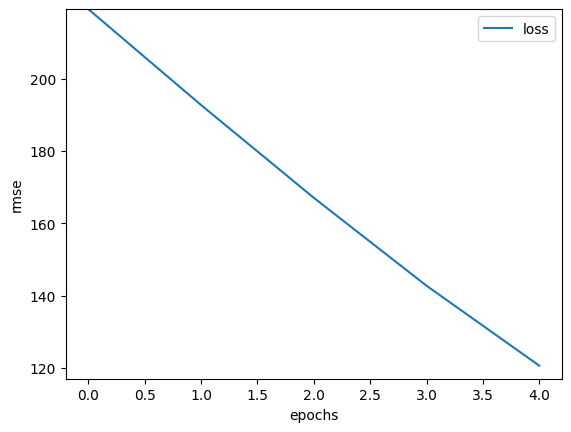

In [45]:
plot_model(weight,bias,my_feature,my_label)
plot_loss_curve(epochs,rmse)